In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.isna().sum();

In [4]:
#dropping all nulls in the dataset
df.dropna(inplace=True)

In [5]:
#checking if nulls were dropped from the dataset
df.isna().sum() == 0

id                      True
imdb_id                 True
popularity              True
budget                  True
revenue                 True
original_title          True
cast                    True
homepage                True
director                True
tagline                 True
keywords                True
overview                True
runtime                 True
genres                  True
production_companies    True
release_date            True
vote_count              True
vote_average            True
release_year            True
budget_adj              True
revenue_adj             True
dtype: bool

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [7]:
#drops columns that aren't needed for conclusions
drop_columns = ['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']

df.drop(drop_columns, axis=1, inplace=True)

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [8]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [9]:
#show the average popularity of a movie as we are going to compare budgets vs. popularity
df['popularity'].mean()

1.3167630110441788

In [10]:
#changes dtype to show actual numbers
df['budget_adj'] = df['budget_adj'].astype(int)
df['budget_adj'].describe().astype(int)

count         1992
mean      36273759
std       51297833
min              0
25%              0
50%       15246006
75%       50644500
max      425000000
Name: budget_adj, dtype: int32

In [11]:
bin_edges = [0, 15246006, 50644500, 425000000]

In [12]:
bin_labels = ['Low Budget', 'Moderate Budget', 'Strong Budget']

In [13]:
df['budget_rank'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_labels)

In [14]:
df.groupby(['budget_rank'])['popularity'].mean()

budget_rank
Low Budget         0.817461
Moderate Budget    1.405230
Strong Budget      2.636743
Name: popularity, dtype: float64

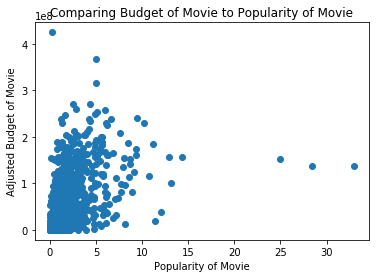

In [15]:
x = df['budget_adj']
y= df['popularity']
plt.scatter(x=y, y=x);

plt.xlabel('Popularity of Movie')
plt.ylabel('Adjusted Budget of Movie')
plt.title('Comparing Budget of Movie to Popularity of Movie');

In [16]:
# Which genres are most popular from year to year?
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy',
       'Action|Crime|Thriller', 'Western|Drama|Adventure|Thriller',
       'Science Fiction|Action|Thriller|Adventure',
       'Drama|Adventure|Science Fiction',
       'Family|Animation|Adventure|Comedy', 'Comedy|Animation|Family',
       'Action|Adventure|Crime',
       'Science Fiction|Fantasy|Action|Adventure',
       'Drama|Science Fiction', 'Action|Comedy|Science Fiction',
       'Action|Adventure|Science Fiction', 'Crime|Drama|Mystery|Western',
       'Crime|Action|Thriller', 'Science Fiction|Action|Adventure',
       'War|Adventure|Science Fiction',
       'Action|Family|Science Fiction|Adventure|Mystery',
       'Action|Drama|Thriller', 'Drama|Romance', 'Comedy|Drama', 'Action',
       'Crime|Comedy|Action|Adventure', 'Drama|Thriller|History',
       'Action|Science Fiction|Thriller', 'Mystery|Drama',
       'Crime|Action|Science F

In [17]:
df['genres'].value_counts()

Drama                                       127
Comedy                                      105
Drama|Romance                                52
Documentary                                  51
Horror|Thriller                              50
                                           ... 
Western|Drama|Adventure|Thriller              1
Science Fiction|Fantasy|Action|Adventure      1
Crime|Horror|Action|Thriller                  1
Horror|Drama|Mystery                          1
Romance|Family|Animation|Fantasy|Music        1
Name: genres, Length: 682, dtype: int64

In [18]:
seperate_genres = ['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Horror', 'Fantasy', 'Comedy', 'Romance', 'Drama', 'Documentary', 'Music',
                  'Mystery', 'Crime', 'Family', 'War', 'Animation', 'Western', 'TV Movie']

Action = 532
Adventure = 361
Science Fiction = 291
Thriller = 575
Horror = 273
Fantasy = 202
Comedy = 640
Romance = 291
Drama = 838
Documentary = 93
Music = 72
Mystery = 148
Crime = 262
Family = 233
War = 44
Animation = 170
Western = 20
TV Movie = 16


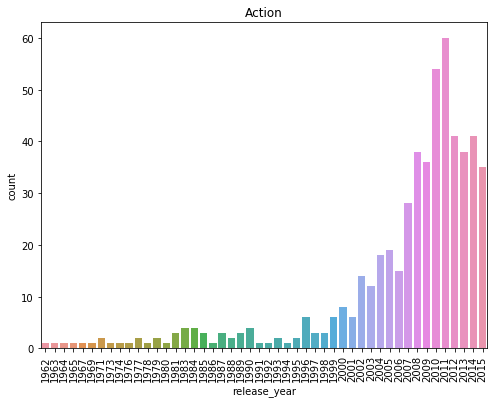

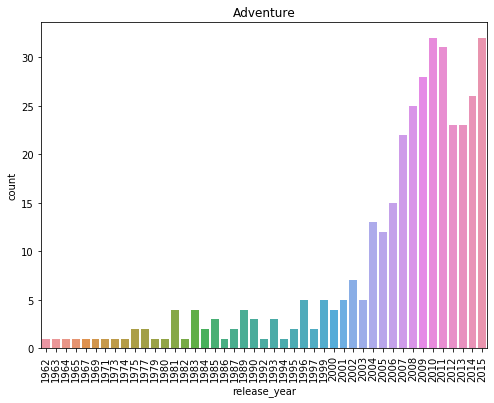

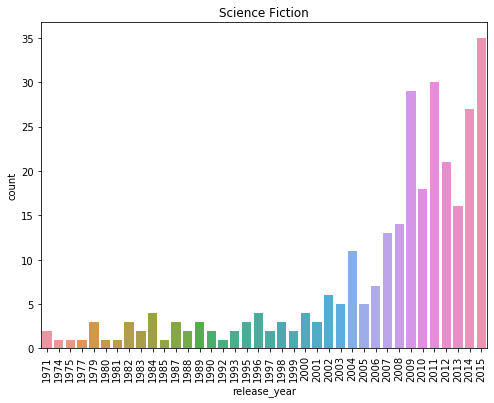

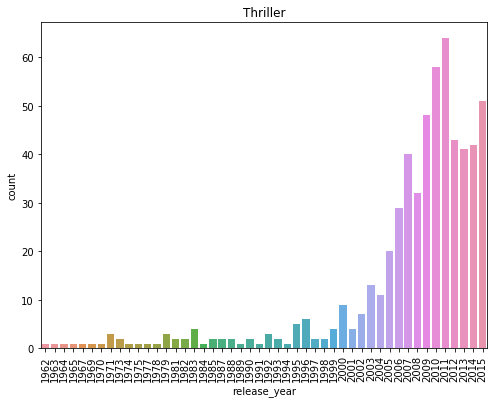

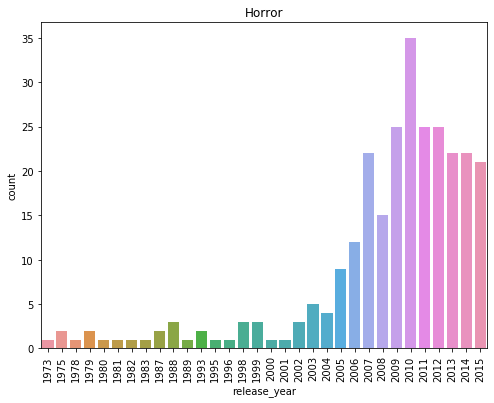

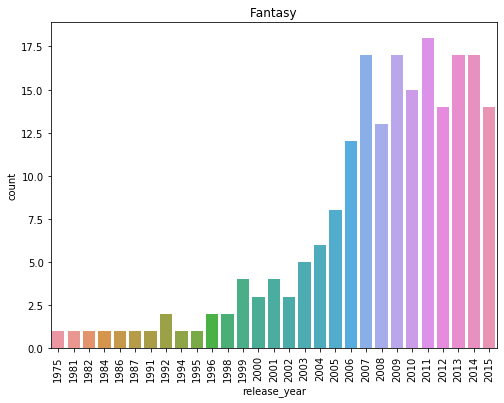

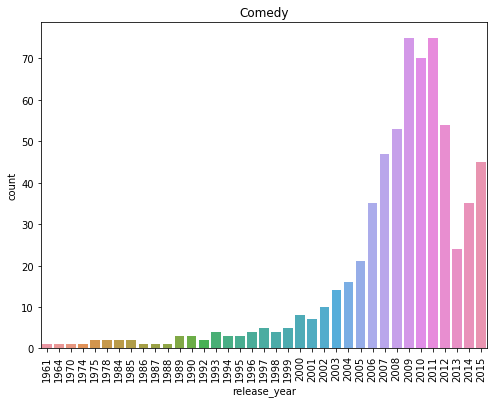

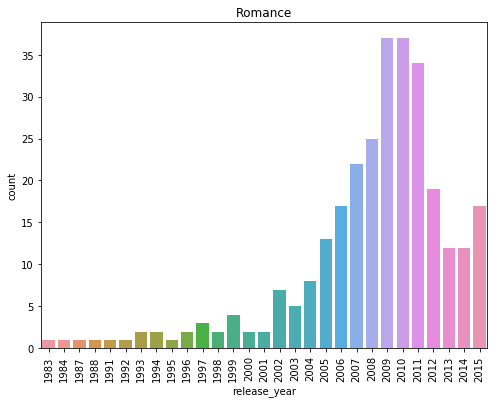

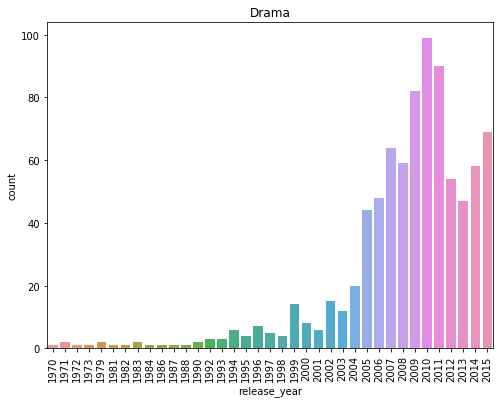

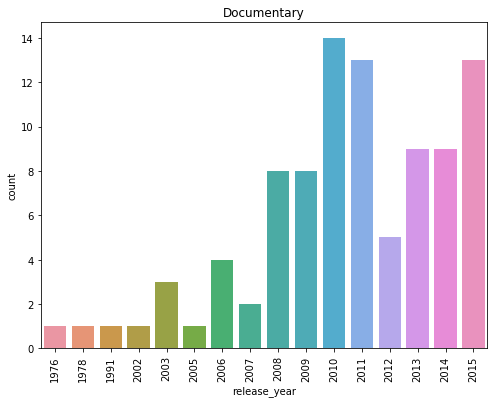

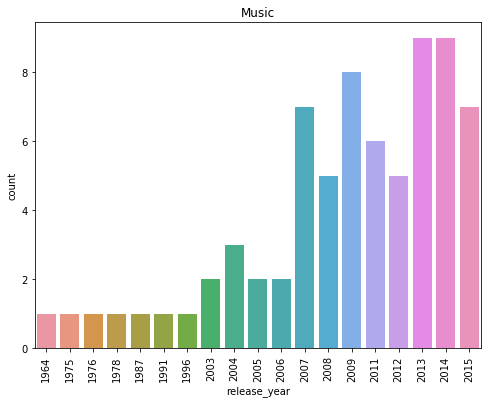

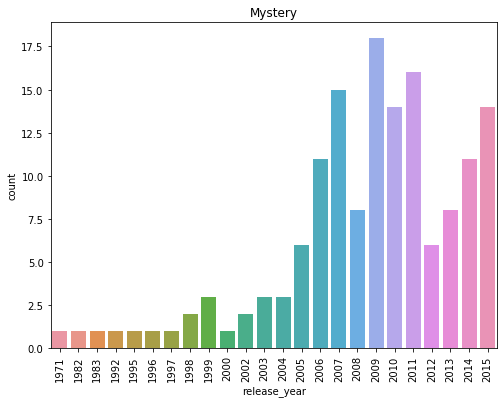

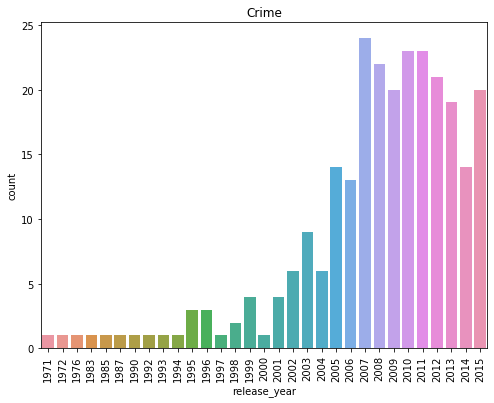

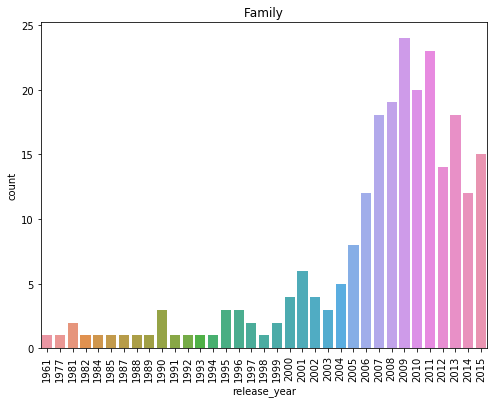

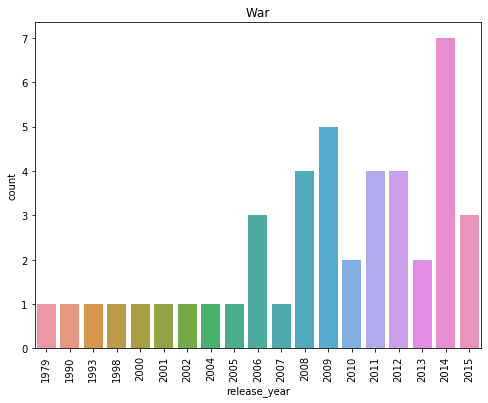

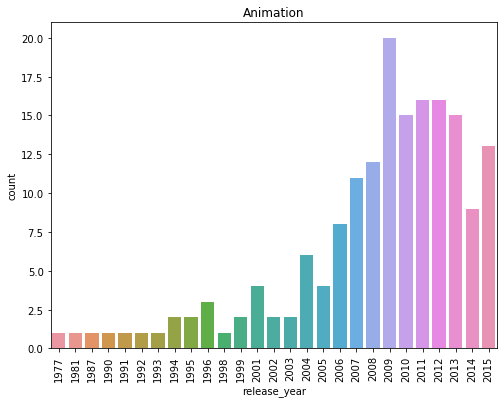

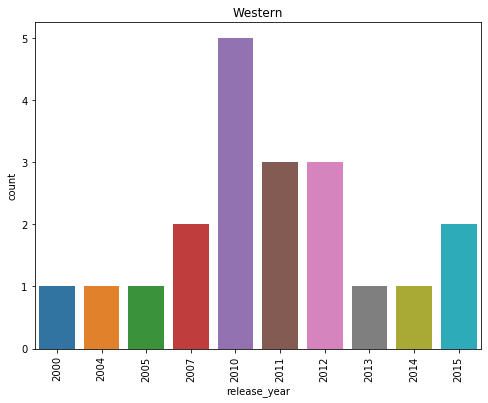

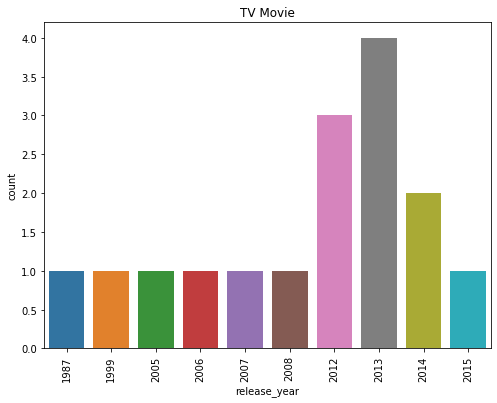

In [21]:
for c in seperate_genres:
    df1 = df['genres'].str.contains(c).fillna(False)
    data = (len(df[df1]))
    print(c, "=", data)
    f, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x='release_year', data=df[df1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(c)